In [2]:
#creating dummy data sets 
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate sample transaction data
num_records = 1000

data = {
    "transaction_id": range(1, num_records + 1),
    "account_id": np.random.randint(1000, 5000, num_records),
    "amount": np.random.uniform(10, 10000, num_records).round(2),
    "timestamp": pd.date_range(start="2024-01-01", periods=num_records, freq="T").astype(str),
    "location": np.random.choice(["London", "New York", "Paris", "Berlin", "Mumbai"], num_records),
    "device": np.random.choice(["Mobile", "Web", "ATM", "POS"], num_records),
    "account_age": np.random.randint(1, 365, num_records),  # Account age in days
    "previous_fraud_count": np.random.randint(0, 5, num_records),  # Past fraud cases
}

# Introduce some fraud cases
data["fraud_flag"] = np.where(
    (data["amount"] > 5000) & (np.random.rand(num_records) > 0.7), 1, 0
)

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
file_path = "C:\Risk detection/financial_transactions.csv"
df.to_csv(file_path, index=False)

# Display first few rows
df.head()


,transaction_id,account_id,amount,timestamp,location,device,account_age,previous_fraud_count,fraud_flag
0,1,4174,5520.36,2024-01-01 00:00:00,Mumbai,ATM,94,1,1
1,2,4507,1656.69,2024-01-01 00:01:00,Paris,ATM,321,3,0
2,3,1860,4118.44,2024-01-01 00:02:00,Mumbai,Mobile,39,4,0
3,4,2294,7778.25,2024-01-01 00:03:00,Berlin,ATM,81,3,0
4,5,2130,4808.90,2024-01-01 00:04:00,London,Mobile,187,2,0


In [4]:
import pandas as pd  

# Load dataset
df = pd.read_csv("C:\Risk detection/financial_transactions.csv")

# Display first 5 rows
print(df.head())

# Check dataset info
print(df.info())

# Check for missing values
print(df.isnull().sum())


   transaction_id  account_id   amount            timestamp location  device  \
0               1        4174  5520.36  2024-01-01 00:00:00   Mumbai     ATM   
1               2        4507  1656.69  2024-01-01 00:01:00    Paris     ATM   
2               3        1860  4118.44  2024-01-01 00:02:00   Mumbai  Mobile   
3               4        2294  7778.25  2024-01-01 00:03:00   Berlin     ATM   
4               5        2130  4808.90  2024-01-01 00:04:00   London  Mobile   

   account_age  previous_fraud_count  fraud_flag  
0           94                     1           1  
1          321                     3           0  
2           39                     4           0  
3           81                     3           0  
4          187                     2           0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   t

In [5]:
!pip install pyodbc pandas sqlalchemy


In [8]:
import pyodbc

# Define SQL Server credentials
server = 'kichu'  # Example: 'localhost', 'DESKTOP-XXXX', or 'yourdomain.database.windows.net'
database = 'fraud_detection'  # Example: 'fraud_detection'
username = ''  # Example: 'sa'
password = ''  # Replace with your actual password

# Create connection string
conn = pyodbc.connect(f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}")

# Test connection
print("Connected to SQL Server successfully!")


Connected to SQL Server successfully!


In [12]:
query = "SELECT DB_NAME() AS CurrentDatabase;"
df = pd.read_sql(query, conn)
print(df)


   CurrentDatabase
0  fraud_detection


In [13]:
from sqlalchemy import create_engine

# Create engine for SQL Server
engine = create_engine(f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver=SQL+Server")

# Upload DataFrame to SQL Server
df.to_sql("transactions", engine, if_exists="replace", index=False)

print("Data inserted successfully!")


Data inserted successfully!


In [19]:
import pyodbc
import pandas as pd

# SQL Server connection details
server = 'kichu'
database = 'fraud_detection'  # Replace with your actual database name
username = ''
password = ''

# Create a connection to the database
conn = pyodbc.connect(f"DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={fraud_detection};UID={username};PWD={password}")

# SQL query to fetch all transactions
query = "SELECT * FROM dbo.transactions"

# Execute query and store results in a DataFrame
df = pd.read_sql(query, conn)

# Display the first few rows of the DataFrame
print(df.head())


NameError: name 'fraud_detection' is not defined

In [26]:
import pyodbc
import pandas as pd

# Define your connection parameters
server = 'kichu'  # Replace with your actual server name
database = 'fraud_detection'  # Replace with your actual database name

# Establish connection to the database using Windows Authentication (Trusted Connection)
conn = pyodbc.connect(f"DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes")

# SQL query to fetch all transactions
query = "SELECT * FROM dbo.transactions"

# Execute query and store results in a DataFrame
df = pd.read_sql(query, conn)

# Display the first few rows of the DataFrame
print(df.head())


   transaction_id    amount        transaction_date
0               1  17653.91 2025-03-22 01:40:49.057
1               2  18764.70 2025-03-22 01:40:49.060
2               3   3365.91 2025-03-22 01:40:49.060
3               4  11683.41 2025-03-22 01:40:49.060
4               5   8238.10 2025-03-22 01:40:49.060


In [27]:
import pyodbc
import pandas as pd

# Define your connection parameters
server = 'kichu'  # Replace with your actual server name
database = 'fraud_detection'  # Replace with your actual database name

# Establish connection to the database using Windows Authentication (Trusted Connection)
conn = pyodbc.connect(f"DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes")

# SQL Query to fetch transactions above 5000
query = "SELECT * FROM dbo.transactions WHERE amount > 5000;"

# Execute query and fetch results into DataFrame
df = pd.read_sql(query, conn)

# Display the result
print(df)


    transaction_id    amount        transaction_date
0                1  17653.91 2025-03-22 01:40:49.057
1                2  18764.70 2025-03-22 01:40:49.060
2                4  11683.41 2025-03-22 01:40:49.060
3                5   8238.10 2025-03-22 01:40:49.060
4                7   6606.66 2025-03-22 01:40:49.060
..             ...       ...                     ...
69              94   5282.88 2025-03-22 01:40:49.077
70              95   7407.42 2025-03-22 01:40:49.077
71              96  15968.00 2025-03-22 01:40:49.077
72              98  12015.73 2025-03-22 01:40:49.077
73              99  17671.54 2025-03-22 01:40:49.077

[74 rows x 3 columns]


In [28]:
import pyodbc
import pandas as pd

# Define your connection parameters
server = 'kichu'  # Replace with your actual server name
database = 'fraud_detection'  # Replace with your actual database name

# Establish connection to the database using Windows Authentication (Trusted Connection)
conn = pyodbc.connect(f"DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes")

# SQL Query to fetch transactions above 5000
query = "SELECT * FROM dbo.transactions WHERE amount <= 5000;"

# Execute query and fetch results into DataFrame
df = pd.read_sql(query, conn)

# Display the result
print(df)


    transaction_id   amount        transaction_date
0                3  3365.91 2025-03-22 01:40:49.060
1                6  2908.84 2025-03-22 01:40:49.060
2               12  3844.71 2025-03-22 01:40:49.063
3               19  3996.98 2025-03-22 01:40:49.063
4               21  4475.00 2025-03-22 01:40:49.063
5               29  1459.68 2025-03-22 01:40:49.067
6               32  4538.16 2025-03-22 01:40:49.067
7               34  2917.78 2025-03-22 01:40:49.067
8               36  2939.42 2025-03-22 01:40:49.067
9               41  1094.42 2025-03-22 01:40:49.067
10              44  4189.43 2025-03-22 01:40:49.067
11              46  1562.03 2025-03-22 01:40:49.067
12              47  4820.31 2025-03-22 01:40:49.067
13              52  2579.18 2025-03-22 01:40:49.070
14              55  4454.86 2025-03-22 01:40:49.070
15              59  1476.45 2025-03-22 01:40:49.070
16              61  1852.38 2025-03-22 01:40:49.070
17              65  2003.56 2025-03-22 01:40:49.070
18          

In [29]:
def detect_threshold(amount, threshold=5000):
    if amount > threshold:
        return "Above Threshold"
    else:
        return "Below Threshold"

# Apply the detection function to the dataframe
df['detection'] = df['amount'].apply(detect_threshold)

# Display the result with detection
print(df[['transaction_id', 'amount', 'detection']])


    transaction_id   amount        detection
0                3  3365.91  Below Threshold
1                6  2908.84  Below Threshold
2               12  3844.71  Below Threshold
3               19  3996.98  Below Threshold
4               21  4475.00  Below Threshold
5               29  1459.68  Below Threshold
6               32  4538.16  Below Threshold
7               34  2917.78  Below Threshold
8               36  2939.42  Below Threshold
9               41  1094.42  Below Threshold
10              44  4189.43  Below Threshold
11              46  1562.03  Below Threshold
12              47  4820.31  Below Threshold
13              52  2579.18  Below Threshold
14              55  4454.86  Below Threshold
15              59  1476.45  Below Threshold
16              61  1852.38  Below Threshold
17              65  2003.56  Below Threshold
18              68  3898.51  Below Threshold
19              78  2316.78  Below Threshold
20              82  1813.36  Below Threshold
21        

In [30]:
pip install matplotlib seaborn pandas pyodbc


Note: you may need to restart the kernel to use updated packages.


In [34]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define database connection
server = 'localhost'  # Replace with your server name
database = 'fraud_detection'  # Replace with your database name
conn = pyodbc.connect(f"DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes")

# Load transactions data
query = "SELECT * FROM dbo.transactions"
df = pd.read_sql(query, conn)

# Convert transaction_date to datetime format
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Display first 5 rows
print(df.head())


   transaction_id    amount        transaction_date
0               1  17653.91 2025-03-22 01:40:49.057
1               2  18764.70 2025-03-22 01:40:49.060
2               3   3365.91 2025-03-22 01:40:49.060
3               4  11683.41 2025-03-22 01:40:49.060
4               5   8238.10 2025-03-22 01:40:49.060


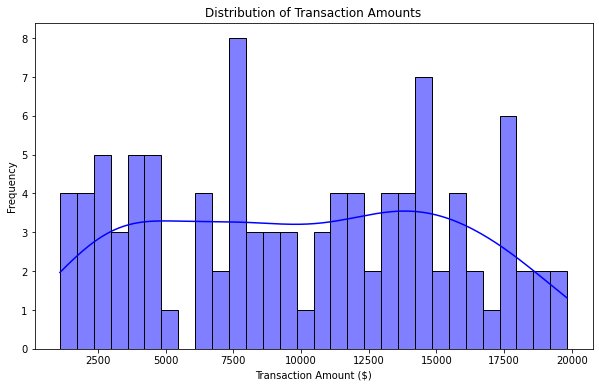

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=30, kde=True, color='blue')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.show()


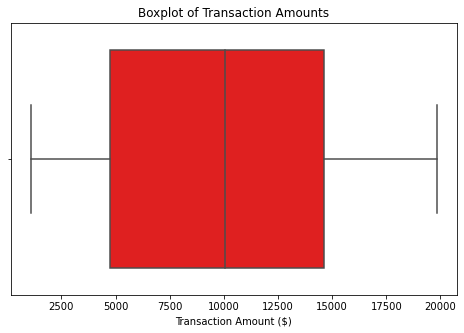

In [36]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['amount'], color='red')
plt.xlabel('Transaction Amount ($)')
plt.title('Boxplot of Transaction Amounts')
plt.show()


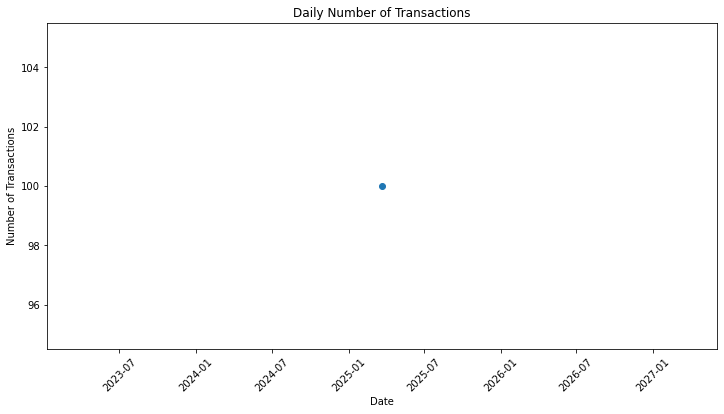

In [37]:
df['date_only'] = df['transaction_date'].dt.date
daily_trend = df.groupby('date_only').size()

plt.figure(figsize=(12, 6))
daily_trend.plot(marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Number of Transactions')
plt.xticks(rotation=45)
plt.show()


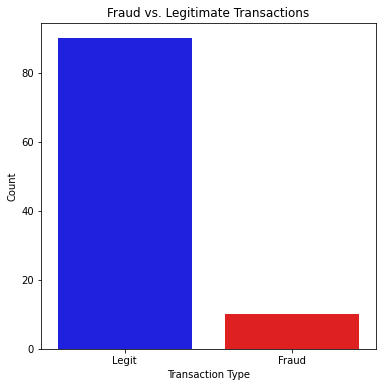

In [38]:
# Creating a fake fraud column for visualization purposes
import numpy as np
df['fraud_label'] = np.random.choice([0, 1], size=len(df), p=[0.9, 0.1])  # 10% fraud

plt.figure(figsize=(6, 6))
sns.countplot(x=df['fraud_label'], palette=['blue', 'red'])
plt.xticks([0, 1], ['Legit', 'Fraud'])
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Fraud vs. Legitimate Transactions')
plt.show()


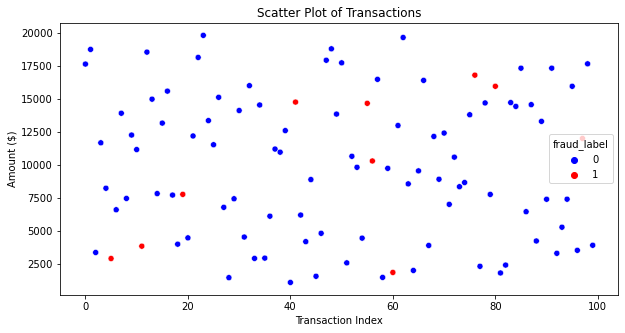

In [39]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.index, y=df['amount'], hue=df['fraud_label'], palette=['blue', 'red'])
plt.xlabel('Transaction Index')
plt.ylabel('Amount ($)')
plt.title('Scatter Plot of Transactions')
plt.show()


In [40]:
#feature engineering 
import pandas as pd
import pyodbc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Connect to SQL Server
server = 'localhost'
database = 'fraud_detection'
conn = pyodbc.connect(f"DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes")

# Load enhanced dataset
query = """
SELECT 
    transaction_id, amount, transaction_date, 
    DATEPART(HOUR, transaction_date) AS transaction_hour,
    DATEDIFF(DAY, MIN(transaction_date) OVER (), transaction_date) AS days_since_first_txn,
    COUNT(*) OVER (PARTITION BY transaction_date) AS transactions_per_day,
    AVG(amount) OVER (PARTITION BY transaction_date) AS avg_amount_per_day
FROM dbo.transactions;
"""
df = pd.read_sql(query, conn)

# Convert transaction_date to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Create fraud labels randomly (for demonstration, ideally you'd have real fraud labels)
import numpy as np
df['fraud_label'] = np.random.choice([0, 1], size=len(df), p=[0.9, 0.1])  # 10% fraud

# Select features and target
X = df[['amount', 'transaction_hour', 'days_since_first_txn', 'transactions_per_day', 'avg_amount_per_day']]
y = df['fraud_label']

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.90
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


C:\Users\kisho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


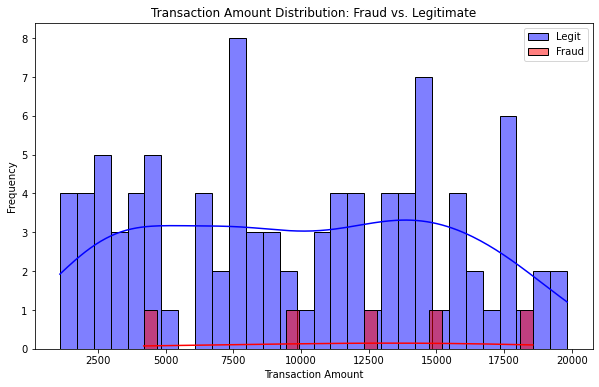

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df[df['fraud_label'] == 0]['amount'], bins=30, color='blue', label='Legit', kde=True)
sns.histplot(df[df['fraud_label'] == 1]['amount'], bins=30, color='red', label='Fraud', kde=True)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Transaction Amount Distribution: Fraud vs. Legitimate')
plt.legend()
plt.show()


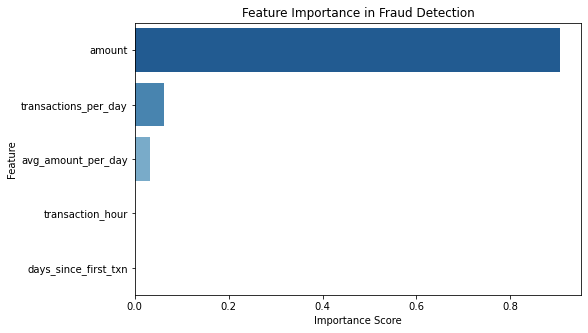

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature Importance Plot
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='Blues_r')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance in Fraud Detection')
plt.show()
